In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm




In [54]:
location1=r"C:\Users\nevta\Desktop\Datasets\suicide\Age-standardized suicide rates.csv"
df=pd.read_csv(location1)

In [55]:
df.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


First data is about age standardized suicide rates for different years.

In [56]:
df["2016"].nlargest(n=10)

406    48.3
289    47.5
211    46.6
256    40.1
43     39.3
469    36.1
511    34.5
281    32.6
118    32.0
157    31.3
Name: 2016, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  549 non-null    object 
 1   Sex      549 non-null    object 
 2   2016     549 non-null    float64
 3   2015     549 non-null    float64
 4   2010     549 non-null    float64
 5   2000     549 non-null    float64
dtypes: float64(4), object(2)
memory usage: 25.9+ KB


# Visualization

In [58]:
df.min()

Country    Afghanistan
Sex         Both sexes
2016               0.0
2015               0.0
2010               0.0
2000               0.1
dtype: object

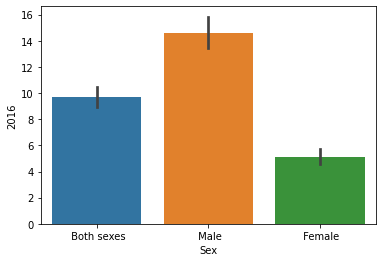

In [59]:
ax=sns.barplot(x="Sex",y="2016",data=df)


(array([160., 165., 112.,  57.,  32.,   9.,   7.,   2.,   2.,   3.]),
 array([ 0.  ,  4.83,  9.66, 14.49, 19.32, 24.15, 28.98, 33.81, 38.64,
        43.47, 48.3 ]),
 <BarContainer object of 10 artists>)

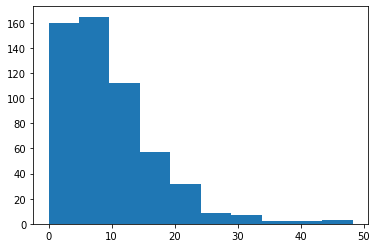

In [60]:
plt.hist(df["2016"])

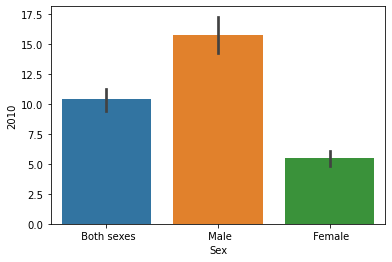

In [61]:
ax=sns.barplot(x="Sex",y="2010",data=df)

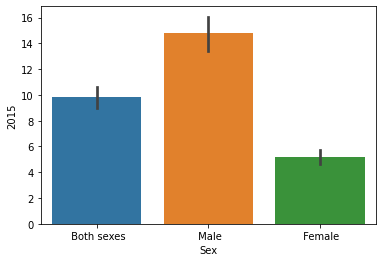

In [62]:
ax=sns.barplot(x="Sex",y="2015",data=df)

 I want to work for the specific sex. Hence I will take the one that mean value is higher than other, Male.

Also, 2016 is an important year for me because the nex dataframework contains data that has been in 2016.

C:\Users\nevta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

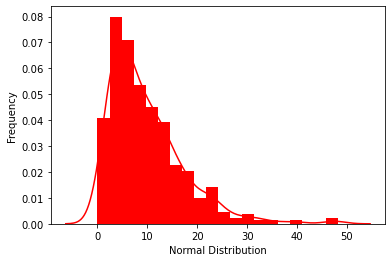

In [63]:
ax = sns.distplot(df['2016'],bins=20,kde=True,color='red',hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
#Assume it is a normally distributed

In [64]:
#I reorganized column.
df["Sex"]=df["Sex"].str.strip()

In [65]:
#Although I see that there are statistical differences between gender, I will use levene test to control whether their variance is equal or not
#H0=Gender have no statistical differences in terms of their variance.
scipy.stats.levene(df[df["Sex"]=="Female"]["2016"],
                   df[df["Sex"]=="Male"]["2016"],
                   df[df["Sex"]=="Both sexes"]["2016"], center="mean")
#reject the hypothesis because p value is lower than 0.05

LeveneResult(statistic=41.26579028485126, pvalue=2.0431118804932987e-17)

In [66]:
Female=df[df["Sex"]=="Female"]["2016"]
Male= df[df["Sex"]=="Male"]["2016"]
Both=df[df["Sex"]=="Both sexes"]["2016"]


In [67]:
#H0=There is no differences between gender about suicide rates in 2016   
fstatistic, pvalue= scipy.stats.f_oneway(Female,Male,Both)
print("f statistic:{0},P value:{1}".format(fstatistic,pvalue))
#Reject the null hypothesis because p value is lower than 0.05
#I have just wanted to show there are differences between gender about suicide rates because I will use one sex for some parts of the my project.                   

f statistic:101.35017263417895,P value:3.69401231168017e-38


# Second Dataset

Second data is about suicide rates(year 2016) per 100000 population in different age range.

In [68]:
# I will get a second data
location2=r"C:\Users\nevta\Desktop\Datasets\suicide\Crude suicide rates.csv"
df2=pd.read_csv(location2)
df2

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1
...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9
545,Zambia,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6
546,Zimbabwe,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6
547,Zimbabwe,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   549 non-null    object 
 1   Sex       549 non-null    object 
 2   80_above  549 non-null    float64
 3   70to79    549 non-null    float64
 4   60to69    549 non-null    float64
 5   50to59    549 non-null    float64
 6   40to49    549 non-null    float64
 7   30to39    549 non-null    float64
 8   20to29    549 non-null    float64
 9   10to19    549 non-null    float64
dtypes: float64(8), object(2)
memory usage: 43.0+ KB


In [70]:
df2["Sex"]=df2["Sex"].str.strip()





In [71]:
print(df2.columns.tolist())
#Hence, I need to be careful for the column names

['Country', 'Sex', '80_above', '70to79', '60to69', '50to59 ', '40to49', '30to39', '20to29', '10to19']


In [72]:
dict={"index":[1,2,3,4,5,6,7,8],
      "Categories":["10to10","20to29","30to39","40to49","50to59 ","60to69","70to79","80_above"],
            "sum":[df2[df2["Sex"]=="Male"]["10to19"].sum(),
                   df2[df2["Sex"]=="Male"]["20to29"].sum(),
                   df2[df2["Sex"]=="Male"]["30to39"].sum(),
                   df2[df2["Sex"]=="Male"]["40to49"].sum(),
                   df2[df2["Sex"]=="Male"]["50to59 "].sum(),
                   df2[df2["Sex"]=="Male"]["60to69"].sum(),
                   df2[df2["Sex"]=="Male"]["70to79"].sum(),
                   df2[df2["Sex"]=="Male"]["80_above"].sum()]}

In [73]:
data = pd.DataFrame(dict)
data

,index,Categories,sum
0,1,10to10,967.9
1,2,20to29,2878.0
2,3,30to39,3074.6
3,4,40to49,3437.9
4,5,50to59,4053.4
5,6,60to69,4624.6
6,7,70to79,6863.5
7,8,80_above,11804.3


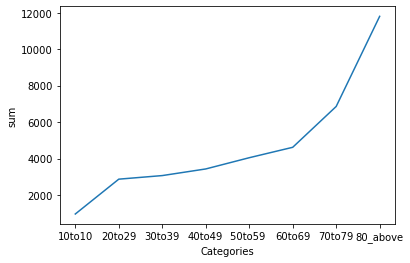

In [75]:
ax=sns.lineplot(data=dict, x="Categories", y="sum")

We can argue that there is a clear dependency to ages for male in suicide rates because when ages go up, rates also go up.


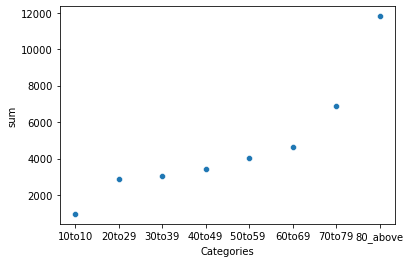

In [78]:
#Indeed, albeit there is a clear that there is a correlation between suicide rates and their ages in Male,we need to look in a statistical way.
ax=sns.scatterplot(x="Categories",y="sum", data=dict)

In [80]:

#H0=There is no correlation between ages and suicide rates in male
#a=0.05
scipy.stats.pearsonr(dict["index"],dict["sum"])
#reject the null hypothesis, and there is a strong correlation.

(0.8881070349307462, 0.003214928363740306)

In [81]:
df2.nunique()

Country     183
Sex           3
80_above    389
70to79      345
60to69      309
50to59      283
40to49      247
30to39      223
20to29      216
10to19      121
dtype: int64

# Data Sets 3

Facilities available year 2016

Mental hospitals (per 100 000 population),
Mental health units in general hospitals (per 100 000 population),
Mental health outpatient facilities (per 100 000 population),
Mental health day treatment facilities (per 100 000 population),
Community residential facilities (per 100 000 population).


In [83]:
location=r"C:\Users\nevta\Desktop\Datasets\suicide\Facilities.csv"
df3=pd.read_csv(location)
df3

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
107,Vanuatu,2016,NaN,0.756,2.645,NaN,NaN
108,Viet Nam,2016,0.043,0.017,0.009,NaN,NaN
109,Yemen,2016,0.033,0.026,0.063,NaN,NaN
110,Zambia,2016,0.062,0.062,0.205,NaN,0.019


There are so many Nan values. Hence, I will replace NaN value with mean values of each column.

In [109]:
#No null
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 112 non-null    object 
 1   Year                    112 non-null    int64  
 2   Mental _hospitals       112 non-null    float64
 3   health_units            112 non-null    float64
 4   outpatient _facilities  112 non-null    float64
 5   day _treatment          112 non-null    float64
 6   residential_facilities  112 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


In [110]:
df3.mean()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3891983329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


Year                      2016.000000
Mental _hospitals            0.246133
health_units                 0.319078
outpatient _facilities       1.875130
day _treatment               1.134804
residential_facilities       0.873311
dtype: float64

In [112]:
df3['Mental _hospitals'] = df3['Mental _hospitals'].replace(np.nan, df3['Mental _hospitals'].mean())
df3['health_units'] = df3['health_units'].replace(np.nan, df3['health_units'].mean())
df3['outpatient _facilities'] = df3['outpatient _facilities'].replace(np.nan, df3['outpatient _facilities'].mean())
df3['day _treatment'] = df3['day _treatment'].replace(np.nan, df3['day _treatment'].mean())
df3['residential_facilities'] = df3["residential_facilities"].replace(np.nan, df3["residential_facilities"].mean())





In [113]:
df3

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003000,0.012000,0.00600,1.134804,0.873311
1,Albania,2016,0.068000,0.068000,0.41000,1.134804,0.445000
2,Algeria,2016,0.048000,0.068000,0.04800,1.134804,0.873311
3,Angola,2016,0.011000,0.319078,1.87513,1.134804,0.014000
4,Antigua and Barbuda,2016,1.001000,0.319078,1.87513,1.134804,0.873311
...,...,...,...,...,...,...,...
107,Vanuatu,2016,0.246133,0.756000,2.64500,1.134804,0.873311
108,Viet Nam,2016,0.043000,0.017000,0.00900,1.134804,0.873311
109,Yemen,2016,0.033000,0.026000,0.06300,1.134804,0.873311
110,Zambia,2016,0.062000,0.062000,0.20500,1.134804,0.019000


In [114]:
df3.mean()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3891983329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


Year                      2016.000000
Mental _hospitals            0.246133
health_units                 0.319078
outpatient _facilities       1.875130
day _treatment               1.134804
residential_facilities       0.873311
dtype: float64

In [115]:
df3.std()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3573745355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.std()


Year                      0.000000
Mental _hospitals         0.815217
health_units              0.589715
outpatient _facilities    3.048440
day _treatment            1.829379
residential_facilities    1.013100
dtype: float64

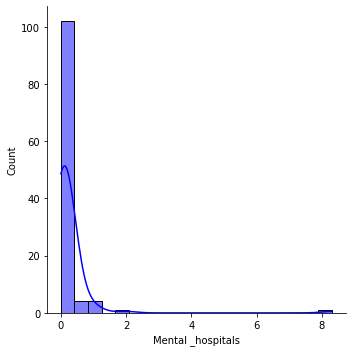

In [116]:
ax=sns.displot(x="Mental _hospitals",bins=20,data=df3, kde=True, color="blue")

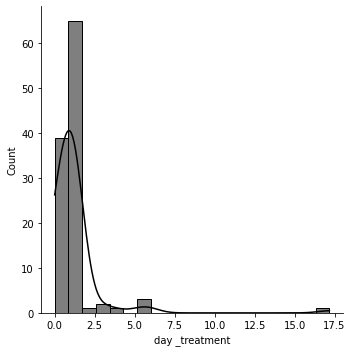

In [117]:
ax=sns.displot(x="day _treatment", bins=20, kde=True,data=df3, color="black")

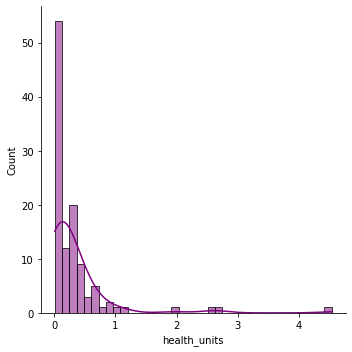

In [118]:
ax=sns.displot(x="health_units", kde=True,data=df3, color="purple")

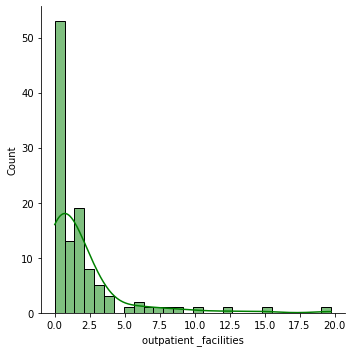

In [119]:
ax=sns.displot(x="outpatient _facilities", kde=True,data=df3, color="green")

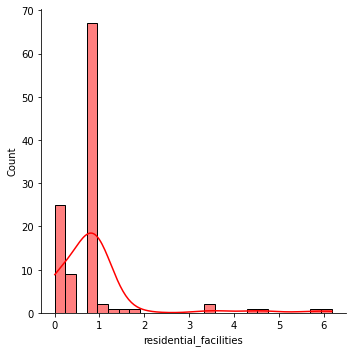

In [120]:
ax=sns.displot(x="residential_facilities", kde=True,data=df3, color="red")

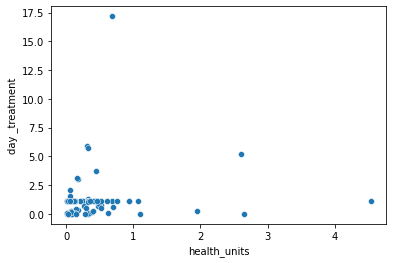

In [121]:
ax=sns.scatterplot(x="health_units", y="day _treatment",data=df3)

In [122]:
df3.std()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3573745355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.std()


Year                      0.000000
Mental _hospitals         0.815217
health_units              0.589715
outpatient _facilities    3.048440
day _treatment            1.829379
residential_facilities    1.013100
dtype: float64

In [123]:
df3.median()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3131045010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.median()


Year                      2016.000000
Mental _hospitals            0.077000
health_units                 0.129500
outpatient _facilities       0.875000
day _treatment               1.134804
residential_facilities       0.873311
dtype: float64

In [124]:
#H0=There is no correlation between Mental hospitals and Mental health day treatment facilities.
ax=scipy.stats.pearsonr(df3["Mental _hospitals"],df3["day _treatment"])
ax
#fail to reject the null hypothesis. Hence, there is no correlation between Mental hospitals and mental health day treatment facilities.

(0.1380191869765537, 0.1467167681788088)

Whether There is a similarity between countries where health units and mental hospitals have a higher value than mean and suicide rates in 2016

In [125]:

avghigherdf3=df3[(df3["health_units"]>= 0.319078) & 
    (df3["Mental _hospitals"]>= 0.246133)][["Country"]]
avghigherdf3

,Country
4,Antigua and Barbuda
5,Argentina
10,Belize
14,Brunei Darussalam
22,Cook Islands
38,Grenada
44,Hungary
45,Iceland
48,Ireland
50,Japan


In [126]:
df.std()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


2016     7.469341
2015     7.633241
2010     8.620174
2000    10.378318
dtype: float64

In [127]:
df.mean()

C:\Users\nevta\AppData\Local\Temp\ipykernel_17000\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


2016     9.792532
2015     9.925683
2010    10.544991
2000    12.164117
dtype: float64

C:\Users\nevta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


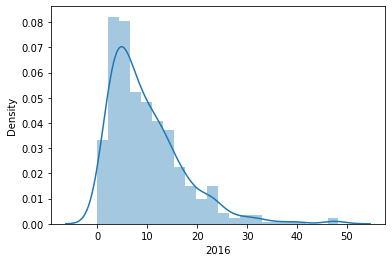

In [128]:
ax=sns.distplot(df["2016"])

I just wanted to observe which countries suicide rates are higher than mean, but some countries are duplicated because of  different sexes. Hence, I will use male as I have used before because they have higher suicide rate.

In [134]:
df[df["2016"]>9.792532][["Country"]]


,Country
1,Afghanistan
10,Angola
16,Argentina
19,Armenia
21,Australia
...,...
543,Zambia
544,Zambia
546,Zimbabwe
547,Zimbabwe


In [130]:
avghigherdf=df[(df["2016"]>9.792532) & (df["Sex"]=="Male")][["Country"]]
avghigherdf

,Country
1,Afghanistan
10,Angola
16,Argentina
19,Armenia
22,Australia
...,...
529,Uzbekistan
538,Viet Nam
541,Yemen
544,Zambia


In [131]:
a=list(avghigherdf["Country"])
b=list(avghigherdf3["Country"])
c=a+b
list1=c
mapping={}
for i, v in enumerate(list1):
    mapping[v]=i
mapping





{'Afghanistan': 0,
 'Angola': 1,
 'Argentina': 126,
 'Armenia': 3,
 'Australia': 4,
 'Austria': 5,
 'Belarus': 6,
 'Belgium': 7,
 'Belize': 127,
 'Benin': 9,
 'Bhutan': 10,
 'Bolivia (Plurinational State of)': 11,
 'Bosnia and Herzegovina': 12,
 'Botswana': 13,
 'Bulgaria': 14,
 'Burkina Faso': 15,
 'Burundi': 16,
 'Cabo Verde': 17,
 'Cameroon': 18,
 'Canada': 19,
 'Central African Republic': 20,
 'Chad': 21,
 'Chile': 22,
 'Colombia': 23,
 'Comoros': 24,
 'Congo': 25,
 'Costa Rica': 26,
 "Côte d'Ivoire": 27,
 'Croatia': 28,
 'Cuba': 29,
 'Czechia': 30,
 "Democratic People's Republic of Korea": 31,
 'Democratic Republic of the Congo': 32,
 'Denmark': 33,
 'Djibouti': 34,
 'Dominican Republic': 35,
 'Ecuador': 36,
 'El Salvador': 37,
 'Equatorial Guinea': 38,
 'Eritrea': 39,
 'Estonia': 40,
 'Eswatini': 41,
 'Ethiopia': 42,
 'Finland': 43,
 'France': 44,
 'Gabon': 45,
 'Gambia': 46,
 'Georgia': 47,
 'Germany': 48,
 'Ghana': 49,
 'Guinea': 50,
 'Guyana': 51,
 'Haiti': 52,
 'Hungary': 131

I will try to  find whether there is a similarity in countries between two. When we merge two sets there are 146 data in our dictionary. When we delete duplicate one and count how many data we have, we understand how many data is duplicated.Duplicated means that one who is included in two datasets.

In [132]:
count=0
empty=[]
for i in c:
    if i not in empty:
        count=count + 1
print(count)

146


There is no similarity between suicide rates and health units and mental hospitals in terms of countries because no data is duplicated.